Importing libraries 

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from math import sqrt
import autosklearn.regression
import time

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


Importing data and defining our X and y

In [2]:
X_train = pd.read_csv('../../Data/California_house/processed/x_train.csv')
y_train_id = pd.read_csv('../../Data/California_house/processed/y_train.csv')
X_test = pd.read_csv('../../Data/California_house/processed/x_test.csv')
y_test_id = pd.read_csv('../../Data/California_house/processed/y_test.csv')
y_train = y_train_id.SalePrice
y_test = y_test_id.SalePrice

We define a list containing "Numerical" if the pre-processed column contain a numerical variable or "Categorical" if the pre-processed column contain a a string variable

In [3]:
#we took these list of feature from Script/California_house
list_of_categorical="MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Id_1,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition"
list_of_categorical=list_of_categorical.split(",")
feature_types=[]
for (col_name,col_data) in X_train.iteritems():
    if (col_name in list_of_categorical):
        feature_types.append("Categorical")
    else:
        feature_types.append("Numerical")

Creation and training of our model

In [4]:
start = time.time()
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)
automl.fit(X_train, y_train, dataset_name='California_house',
           feat_type=feature_types)

elapsed_time=(time.time()-start)

[WARNING] [2020-06-30 21:16:43,963:AutoMLSMBO(1)::California_house] Could not find meta-data directory /opt/conda/lib/python3.7/site-packages/autosklearn/metalearning/files/r2_regression_dense


Display of interestings features of our model

In [5]:
print(automl.show_models())
predictions = automl.predict(X_test)
print("rmse score:", sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))
print("elapsed time:",elapsed_time)

[(1.000000, MyDummyRegressor(configuration=1, init_params=None, random_state=None)),
]
rmse score: 66983.47113667932
elapsed time: 121.67469263076782


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [6]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: California_house
  Metric: r2
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 26
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



Display of Residual Plot

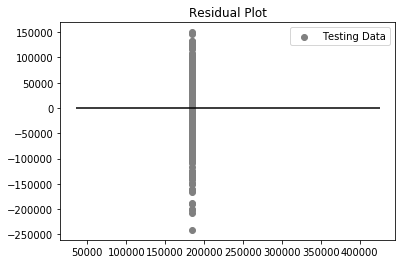

In [7]:
import matplotlib.pyplot as plt

#plot residuals
plt.scatter(predictions, predictions - y_test, c="grey", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
